
# Testing Custom Dataset



We have curated two datasets with majorly AI and majorly real parts of the images. In majorly AI images, most area of the image consists of AI elements, whereas, in majorly real image consists of real parts more than AI parts.

It is also necessary to point out that the real images are also more blur than clear. We are only considering datatsets of sizes 60 and 100 each of majorly AI and majorly real images.

In [2]:
#testing the model on majorly AI data and majorly real data

In [3]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import time

In [4]:
import tensorflow
import torch
import zipfile

In [6]:
from zipfile import ZipFile

In [8]:
filename_ai = '/root/majorAI.zip'
filename_real = '/root/processed.zip'

with ZipFile(filename_ai, 'r') as zip:
  zip.extractall()
  print('done')

with ZipFile(filename_real, 'r') as zip:
  zip.extractall()
  print('done')

done
done


In [15]:
ai_images = []
real_images = []

In [17]:
zip_file_path1 = '/root/majorAI.zip'
zip_file_path2 = '/root/processed.zip'

In [19]:
def is_image_file(filename):
    return filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))

In [20]:
with zipfile.ZipFile(zip_file_path1, 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        file_path = file_info.filename

        if not is_image_file(file_path):
            continue

        with zip_ref.open(file_path) as file:
            image = Image.open(file)
            image = image.convert('RGB')
            ai_images.append(image)

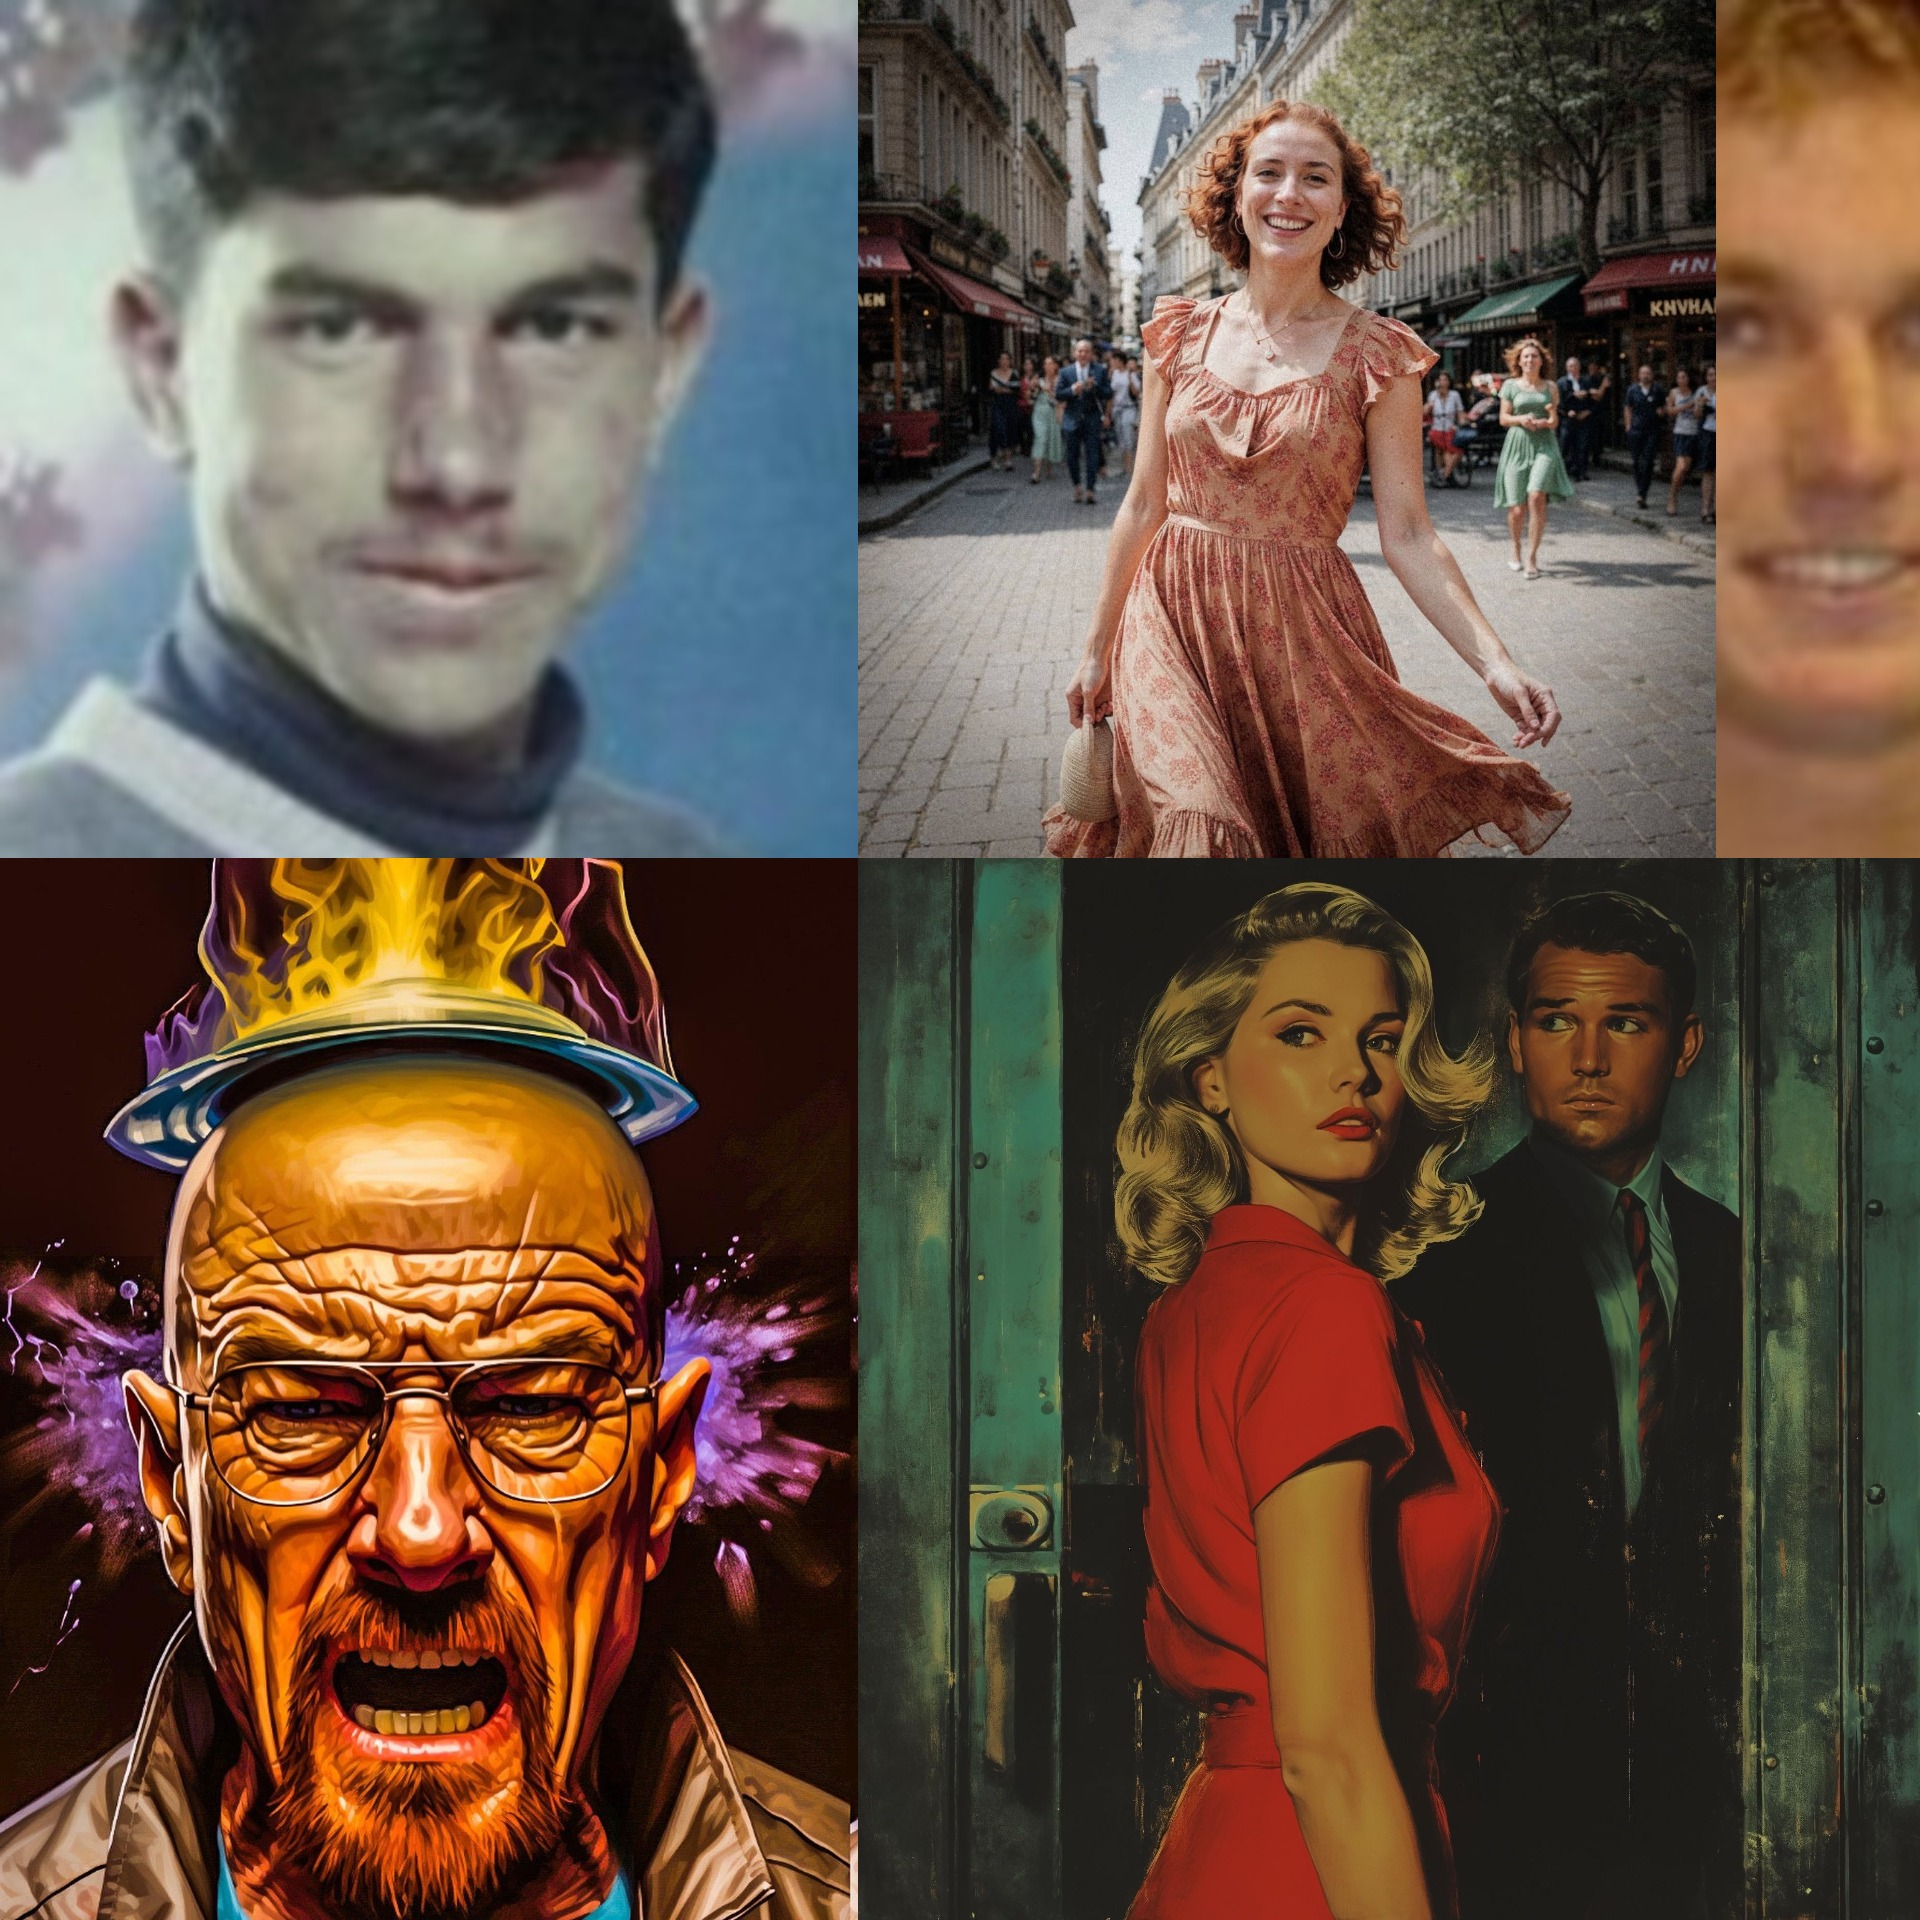

In [23]:
ai_images[0]

In [24]:
with zipfile.ZipFile(zip_file_path2, 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        file_path = file_info.filename

        if not is_image_file(file_path):
            continue

        with zip_ref.open(file_path) as file:
            image = Image.open(file)
            image = image.convert('RGB')
            real_images.append(image)

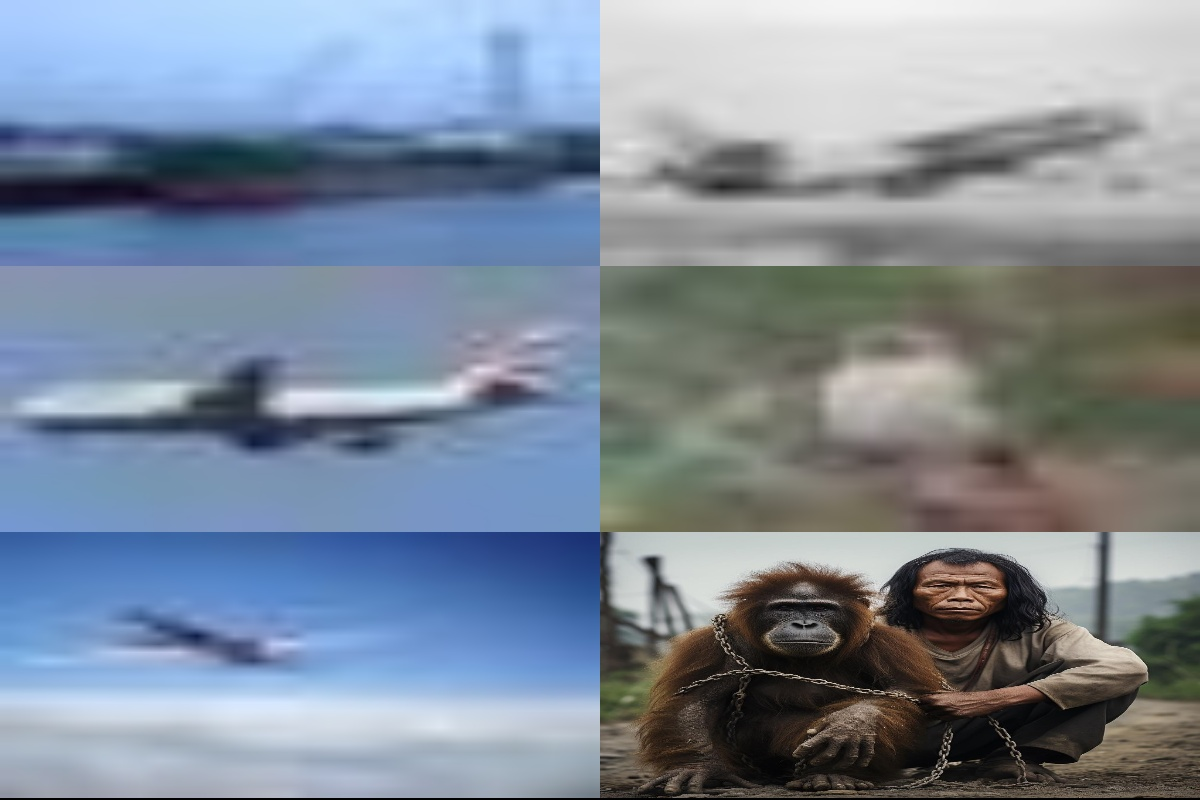

In [26]:
real_images[10]

In [28]:
from tensorflow.keras.models import load_model

In [29]:
model = load_model('ai_imageclassifier.h5')

In [31]:
import keras
import tensorflow as tf

In [35]:
def predict(image):
  img_array = keras.utils.img_to_array(image)
  img_array = tf.expand_dims(img_array, 0)
  img_array = tf.image.resize(img_array, (150, 150))
  img_array /= 255.0
  pred = model.predict(img_array)
  if(pred[0] > 0.5):
    return 1
  else:
    return 0

In [36]:
prediction_ai = 0
prediction_real = 0;

In [37]:
for i in range(len(ai_images)):
  prediction = predict(ai_images[i])
  if(prediction == 1):
    prediction_ai += 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━

In [38]:
prediction_ai

23

In [39]:
for i in range(len(real_images)):
  prediction = predict(real_images[i])
  if(prediction == 0):
    prediction_real += 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

In [40]:
prediction_real

52

In [41]:
len(real_images)

100

In [42]:
len(ai_images)

60

We can see that :

1.   Out of the 60 images, with majorly AI fragments, the model is able to predict 23 correct
2.   Out of the 100 images with majorly real fragments, the model is able to predict 52 correct

